In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# import missingno as mno
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df=df.drop(['car_ID'],axis=1)

In [6]:
df['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
#all var's in correct format, however since symboling is a categorical var we need to change its type
# converting symboling to categorical
df['symboling'] = df['symboling'].astype('object')

In [8]:
#Extracting car names. car name is the first word (before space)
carnames = df['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [9]:
df['car_company']=carnames
df['car_company'].value_counts()

#many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
# we need to fix incorrect spelling and get carnames column in order

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
vw              2
maxda           2
toyouta         1
Nissan          1
mercury         1
vokswagen       1
porcshce        1
Name: car_company, dtype: int64

In [10]:
#volkswagen
df.loc[(df['car_company']=="vw")|(df['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

df.loc[(df['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
df.loc[(df['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
df.loc[df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
df.loc[df['car_company'] == "maxda", 'car_company'] = 'mazda'

df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

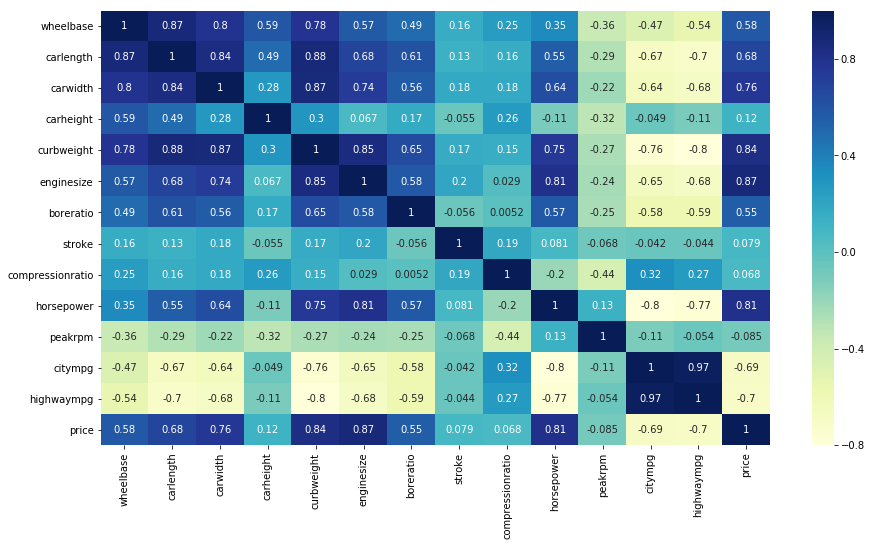

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

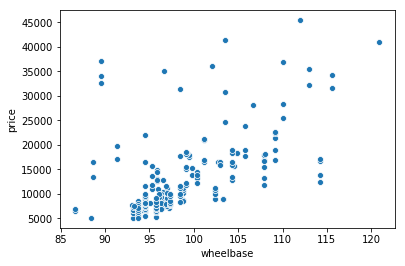

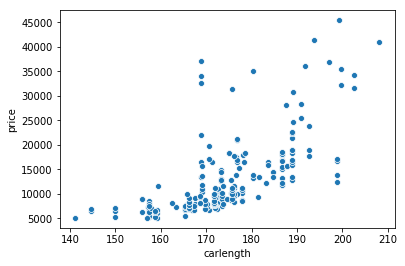

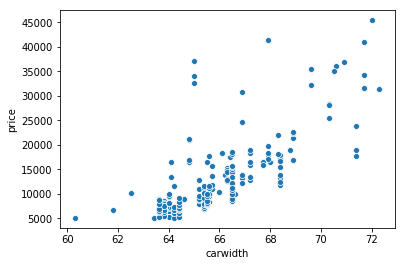

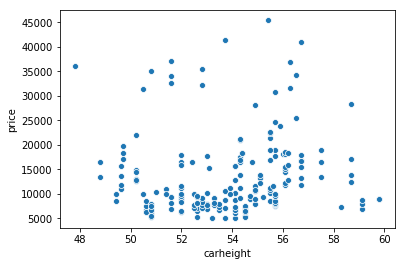

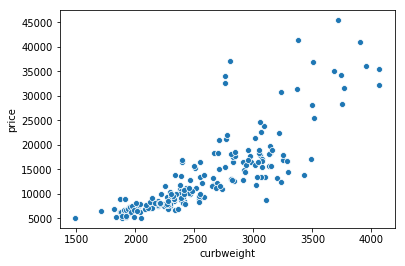

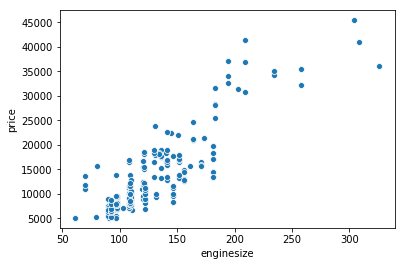

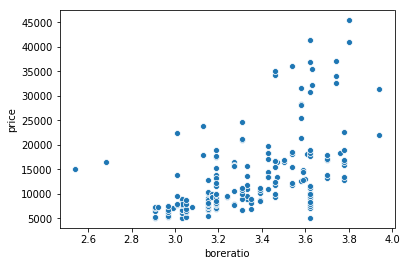

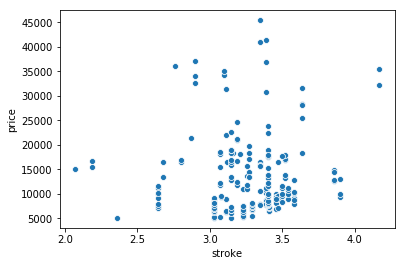

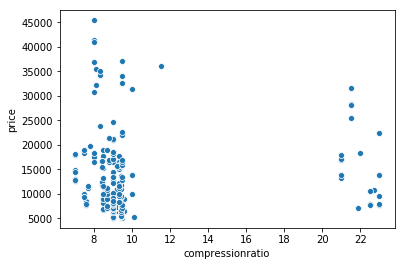

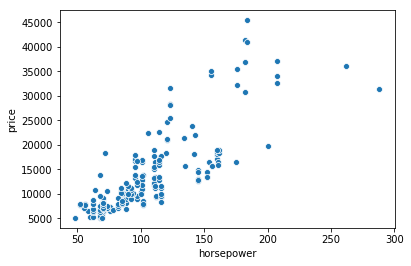

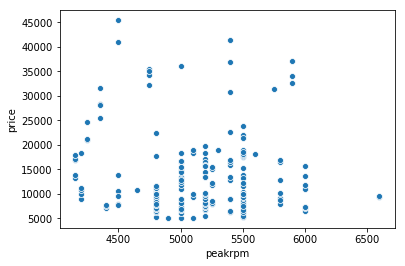

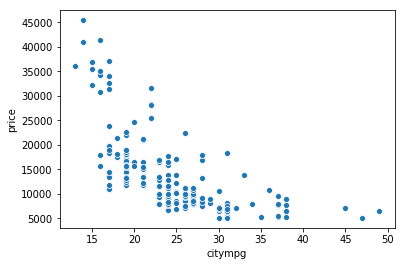

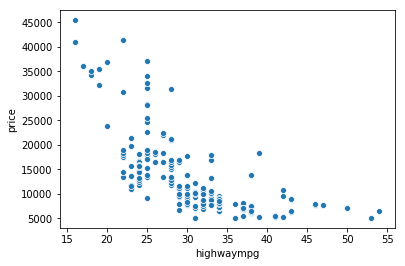

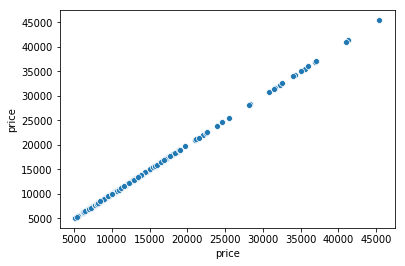

In [12]:
for i, col in enumerate (df.select_dtypes(include=['float64','int64']).columns):
    plt.figure(i)
    sns.scatterplot(x=df.select_dtypes(include=['float64','int64'])[col],y=df['price'])

In [13]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [14]:
#Getting Dummy variables
company=pd.get_dummies(df['car_company'],drop_first=True)
fuel=pd.get_dummies(df['fueltype'],drop_first=True)
aspiration=pd.get_dummies(df['aspiration'],drop_first=True)
doornumber=pd.get_dummies(df['doornumber'],drop_first=True)
carbody=pd.get_dummies(df['carbody'],drop_first=True)
drivewheel=pd.get_dummies(df['drivewheel'],drop_first=True)
enginelocation=pd.get_dummies(df['enginelocation'],drop_first=True)
enginetype=pd.get_dummies(df['enginetype'],drop_first=True)
cylindernumber=pd.get_dummies(df['cylindernumber'],drop_first=True)
fuelsystem=pd.get_dummies(df['fuelsystem'],drop_first=True)

In [15]:
df.drop(['car_company','fueltype','aspiration','doornumber',
              'carbody','drivewheel','enginelocation','enginetype',
             'cylindernumber','fuelsystem'],axis=1,inplace=True)

In [16]:
df=pd.concat([df,company,fuel,aspiration,doornumber,
           carbody,drivewheel,enginelocation,enginetype,
           cylindernumber,fuelsystem],axis=1)

In [17]:
df.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df['price']=pd.to_numeric(df['price'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
symboling           205 non-null object
CarName             205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               205 non-null uint8
chevrolet           205 non-null uint8
dodge               205 non-null uint8
honda               205 non-null uint8
isuzu              

In [20]:
x=df.drop(['price','CarName'],axis=1)
y=df['price']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=100)

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
predictions=lm.predict(x_test)

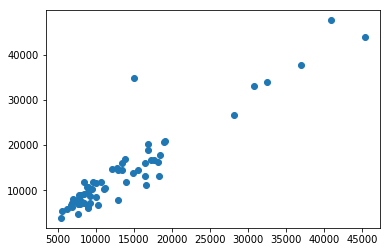

In [23]:
plt.scatter(y_test, predictions)

In [24]:
from sklearn import metrics

In [25]:
metrics.explained_variance_score(y_test, predictions)

0.8429790607958066

In [26]:
metrics.mean_absolute_error(y_test, predictions)

2030.952907778322

In [27]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=predictions)

0.84192459868542

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


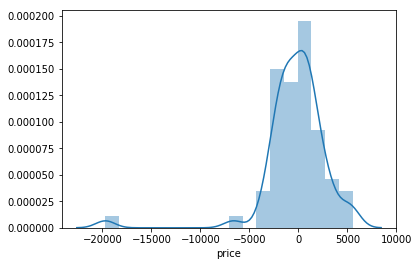

In [28]:
sns.distplot(y_test-predictions)